## MNIST CLassification from scratch
by Robert

This model uses only linear layer we can attach linear linear like attaching pipes

In [1]:
%pylab
%matplotlib inline
from tensorflow import keras
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
def plot(img,label):
    imshow(img)
    plt.title("Label: "+str(label))

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


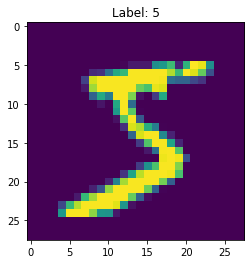

In [2]:
plot(X_train[0].reshape(28,28),y_train[0])

In [183]:
class Linear(object):
    def __init__(self,input_dim,output_dim):
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.text="Linear_"
        self.w=0.1*np.random.random((input_dim,output_dim))-0.1
        self.delta=None
    def forward(self,x):
        assert(x.shape[1]==self.input_dim)
        self.previous=x
        self.hs = np.dot(x,self.w)
        return self.hs
    def backward(self,delta=None,prev_layer=None,lr=0.005):
        prev_delta=delta.dot(self.w.T)
        if len(prev_layer)>0:
            prev_layer[-1].backward(prev_delta,prev_layer[:-1])
        self.w+=lr*self.previous.T.dot(delta)

In [185]:
class Sequencal(object):
    def __init__(self,*args):
        self.layer=[l for l in args]
        self.num_layer=len(self.layer)
        #self.parameters={l.text+str(i):l.w for i,l in enumerate(self.layer)}
    def forward(self,x):
        assert(self.layer[0].input_dim == x.shape[1])
        for i in range(self.num_layer):
            x=self.layer[i].forward(x)
        return x
    def predict(self,test):
        assert(self.layer[0].input_dim==test.shape[1])
        for i in range(self.num_layer):
            test=self.layer[i].forward(test)
        return np.argmax(test,axis=1)

In [186]:
class Crossentropy(object):
    def __init__(self,y_true,y_pred,model):
        self.y_true=y_true
        self.y_pred=y_pred
        self.layers=model.layer
        self.n=self.y_true.shape[0]
    def forward(self):
        loss=np.sum((self.y_true-self.y_pred)**2)/len(self.y_true)
        return loss
    def backward(self,lr=0.001):
        delta=(self.y_true-self.y_pred)
        self.layers[-1].backward(delta,self.layers[:-1],lr=lr)

In [187]:
t=6000
labels=np.zeros((len(y_train[:t]),10))
for i in range(t):
    labels[i,y_train[i]]=1

In [190]:
model=Sequencal(Linear(784,40),Linear(40,10))
for e in range(5):
    loss=0
    for i in range(t):
        pred=model.forward(X_train[i].reshape(-1,784)/255.)
        entropy=Crossentropy(labels[i],pred,model)
        loss+=entropy.forward()
        entropy.backward(lr=0.00001)
    res=model.predict(X_train[:t].reshape(-1,784)/255.)
    print("loss: {},Train_acc :{},Test_acc: {}".format(round(loss/t,5),round(np.mean(res==y_train[:t]),5),np.mean(model.predict(X_test.reshape(-1,784))==y_test)))

loss: 0.16176,Train_acc :0.80117,Test_acc: 0.7925
loss: 0.05221,Train_acc :0.8295,Test_acc: 0.8158
loss: 0.04674,Train_acc :0.8425,Test_acc: 0.8258
loss: 0.0444,Train_acc :0.84733,Test_acc: 0.8308
loss: 0.04307,Train_acc :0.85233,Test_acc: 0.8335


In [199]:
def view_classify(img, ps):
    ps = ps.squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.reshape(28, 28))
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

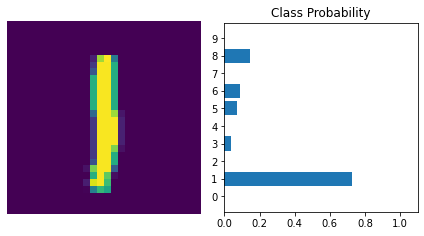

In [218]:
i=np.random.randint(0,1000)
view_classify(X_test[i],model.forward(X_test[i].reshape(1,-1)/255.))